In [18]:
import math
import copy
import torch
from torch import nn, einsum
import torch.nn.functional as F
from inspect import isfunction
from collections import namedtuple
from functools import partial

from einops import rearrange, reduce
from einops.layers.torch import Rearrange

#from model.diffusion.model import * 
from diff_utils.helpers import * 

import numpy as np
import os
from statistics import mean
from tqdm.auto import tqdm
import open3d as o3d

from models import CombinedModel

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def get_latent(latent_dir):
    latent_files = os.listdir(latent_dir)

    latents = np.zeros((len(latent_files),256))

    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path).cpu().numpy()
        latents[id_,:] = latent

    return latents

def plot_latent(latent_dir):
    latent_files = os.listdir(latent_dir)

    latents = np.zeros((len(latent_files),256))

    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path).cpu().numpy()
        latents[id_,:] = latent

    # 创建一个图形窗口
    fig = plt.figure(figsize=(12, 6))

    # 第一个子图 - 散点图
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
    tsne_results = tsne.fit_transform(latents)
    ax1 = fig.add_subplot(1, 2, 1)  # 1行2列的第1个
    ax1.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
    ax1.set_title('Scatter plot')

    # 第二个子图 - 图像显示
    ax2 = fig.add_subplot(1, 2, 2)  # 1行2列的第2个
    cax = ax2.imshow(latents, cmap='hot', interpolation='nearest')
    ax2.set_title("Heatmap of Concatenated Vectors")
    fig.colorbar(cax, ax=ax2, orientation='vertical')
    
    plt.show()

    # plt.imshow(latents, cmap='hot', interpolation='nearest')
    # plt.colorbar()
    # plt.title("Heatmap of Concatenated Vectors")
    # plt.show()

def plot_latent2(latent_dir):
    latent_files = os.listdir(latent_dir)

    latents = np.zeros((len(latent_files),256))

    for id_, latent_file in tqdm(enumerate(latent_files)):
        latent_path = os.path.join(latent_dir, latent_file)
        latent = torch.load(latent_path).cpu().numpy()
        latents[id_,:] = latent

    means = np.mean(latents,axis=0)
    std_devs = np.std(latents,axis=0)
    num_elements = latents.shape[1]
    # Plotting bars for means
    positions = np.arange(num_elements)  # X positions for the bars
    plt.bar(positions, means, yerr=std_devs, capsize=5, color='skyblue', ecolor='black', error_kw=dict(lw=1, capthick=1))

    # Adding labels and title
    plt.xlabel('Vector Element')
    plt.ylabel('Value')
    plt.title('Distribution of Each Element Across Vectors (Mean and Standard Deviation)')
    plt.xticks(positions)
    plt.show()
##%%

In [5]:
sepcs_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond_debug/specs.json"
diffusion_ckpt_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond_test/last.ckpt"
num_samples = 10

specs = json.load(open(sepcs_path))
print(specs["Description"])

model = CombinedModel(specs)

# model = model.load_from_checkpoint(specs["modulation_ckpt_path"], specs=specs, strict=False)

ckpt = torch.load(diffusion_ckpt_path)
new_state_dict = {}
for k,v in ckpt['state_dict'].items():
    new_key = k.replace("diffusion_model.", "") # remove "diffusion_model." from keys since directly loading into diffusion model
    new_state_dict[new_key] = v
model.diffusion_model.load_state_dict(new_state_dict)

model = model.cuda().eval()

samples = model.diffusion_model.generate_unconditional(10)

for lat_vec in samples:
    torch.save("")

diffusion training (unconditional) on old sofa datset
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size([10, 3, 256])
tokens shape:  torch.Size(

TypeError: save() missing 1 required positional argument: 'f'

In [6]:
config_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond2"

ckpt_name="epoch=4999"

sepcs_path = os.path.join(config_path, "specs.json")
diffusion_ckpt_path = os.path.join(config_path, "{}.ckpt".format(ckpt_name))
output_path = os.path.join(config_path,"output",ckpt_name)
# num_samples = 40
num_samples = 60

if not os.path.exists(output_path):
    os.makedirs(output_path)

specs = json.load(open(sepcs_path))
print(specs["Description"])

model = CombinedModel(specs)

# model = model.load_from_checkpoint(specs["modulation_ckpt_path"], specs=specs, strict=False)

ckpt = torch.load(diffusion_ckpt_path)
new_state_dict = {}
for k,v in ckpt['state_dict'].items():
    new_key = k.replace("diffusion_model.", "") # remove "diffusion_model." from keys since directly loading into diffusion model
    new_state_dict[new_key] = v
model.diffusion_model.load_state_dict(new_state_dict)

model = model.cuda().eval()

samples = model.diffusion_model.generate_unconditional(num_samples)

for idx, lat_vec in tqdm(enumerate(samples)):
    lat_vec_path = os.path.join(output_path,"test_{}.pth".format(idx))
    torch.save(lat_vec, lat_vec_path)

plot_latent(output_path)

diffusion training (unconditional) on new dataset
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60, 3, 256])
tokens shape:  torch.Size([60,

0it [00:00, ?it/s]

diffusion training (unconditional) on new dataset
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens shape:  torch.Size([100, 3, 256])
tokens 

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.518514
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.777782
[t-SNE] KL divergence after 950 iterations: 0.193866


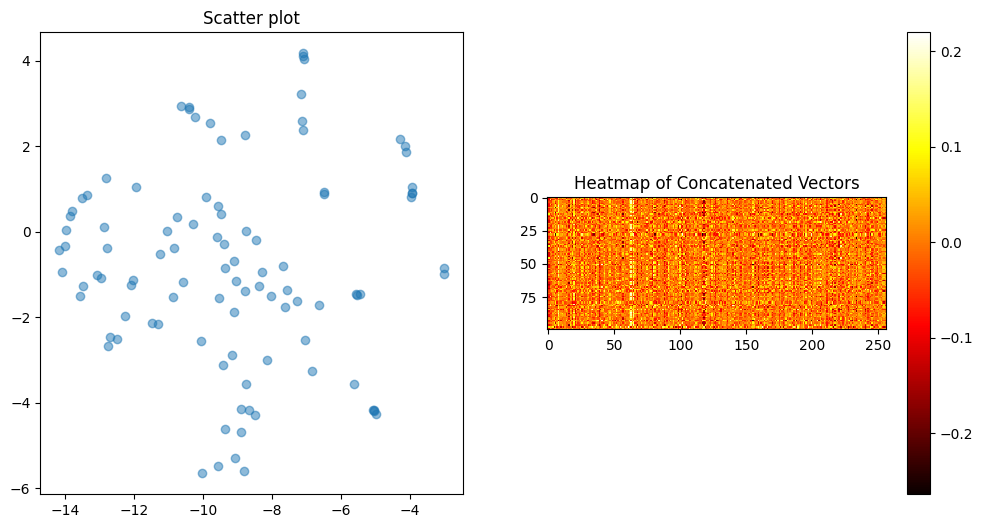

In [19]:
config_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_uncond2_l1" # train_size 364

# ckpt_name="epoch=4999"
# ckpt_name="epoch=999"
ckpt_name="epoch=11999" # 有一点
ckpt_name="epoch=16999" # 更有
ckpt_name="epoch=24999" # 有
ckpt_name="epoch=43999"

sepcs_path = os.path.join(config_path, "specs.json")
diffusion_ckpt_path = os.path.join(config_path, "{}.ckpt".format(ckpt_name))
output_path = os.path.join(config_path,"output",ckpt_name)
# num_samples = 40
num_samples = 100

if not os.path.exists(output_path):
    os.makedirs(output_path)

specs = json.load(open(sepcs_path))
print(specs["Description"])

model = CombinedModel(specs)

# model = model.load_from_checkpoint(specs["modulation_ckpt_path"], specs=specs, strict=False)

ckpt = torch.load(diffusion_ckpt_path)
new_state_dict = {}
for k,v in ckpt['state_dict'].items():
    new_key = k.replace("diffusion_model.", "") # remove "diffusion_model." from keys since directly loading into diffusion model
    new_state_dict[new_key] = v
model.diffusion_model.load_state_dict(new_state_dict)

model = model.cuda().eval()

samples = model.diffusion_model.generate_unconditional(num_samples)

for idx, lat_vec in tqdm(enumerate(samples)):
    lat_vec_path = os.path.join(output_path,"test_{}.pth".format(idx))
    torch.save(lat_vec, lat_vec_path)

plot_latent(output_path)

0it [00:00, ?it/s]

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.526060
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.355888
[t-SNE] KL divergence after 800 iterations: 0.136494


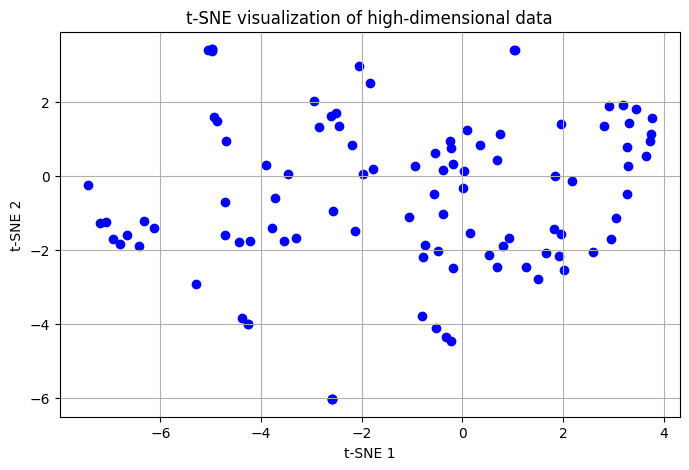

In [15]:
data = get_latent(output_path)

# # 假设数据
# N = 100  # 假设有100个数据点
# data = np.random.rand(N, 256)  # 生成随机数据作为示例

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results = tsne.fit_transform(data)

# 可视化结果
plt.figure(figsize=(8, 5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue')
plt.title('t-SNE visualization of high-dimensional data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()